<a href="https://colab.research.google.com/github/Saaj369/AO_project_MultiRobotTaskAllocation/blob/main/MultiRobotTaskAllocationnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from shapely.geometry import LineString, Polygon
import numpy as np
import math

In [2]:

def is_Visible(polygons, path):
  if path.length == 0:
    return False
  for polygon in polygons:
    if path.intersects(polygon) and not path.touches(polygon):
      return False
  return True


def obstaclesInWay(polygons, path):
  obstacles = []
  for polygon in polygons:
    if path.intersects(polygon) and not path.touches(polygon):
      obstacles.append(polygon)
  return obstacles


def findVisibleVerts(polygons, start, obstaclesinWay):
  visibleVerts = []
  for polygon in obstaclesinWay:
    verts = list(polygon.exterior.coords)
    verts.pop()
    for vert in verts:
      path_ = LineString([start, vert])
      if is_Visible(polygons, path_):
        visibleVerts.append(vert)

  return visibleVerts


def findVertsSeeingTarget(polygons, V_subopt, target):
  vertsThatSeesTarget = []
  for vert in V_subopt:
    path_ = LineString([target, vert])
    if is_Visible(polygons, path_):
      vertsThatSeesTarget.append(vert)
  return vertsThatSeesTarget

In [3]:
def chooseGuidancePoint(start, target, V_opt, V_subopt):
  # print(V_opt, V_subopt)
  def distanceofPointFromLine(vert, start, target):
    a,b,c,d = start[0], start[1], target[0], target[1]
    x,y = vert[0], vert[1]
    dist = abs((d-b)*x+(a-c)*y+(b*c-a*d))/math.sqrt((d-b)**2+(a-c)**2)
    return dist

  def closestPointToLine(verts, start, target):
    distances = [distanceofPointFromLine(vert, start, target) for vert in verts]
    return verts[distances.index(min(distances))]

  def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

  # def farthestPointInLineDirection(verts, start, target):
  #   distances = [distanceofPointFromLine(vert, start, target) for vert in verts]
  #   vikarn = [distance(start, vert) for vert in verts]
  #   perpendicularDist = [math.sqrt(abs(vikarn[i]**2 - distances[i]**2)) for i in range(len(vikarn))]
  #   return verts[perpendicularDist.index(max(perpendicularDist))]

  def farthestPointInLineDirection(verts, start, target):
    def normalize(v):
      length = math.hypot(v[0], v[1])
      return (v[0]/length, v[1]/length)

    def vector(a, b):
        return (b[0] - a[0], b[1] - a[1])

    def dot(a, b):
        return a[0]*b[0] + a[1]*b[1]
    dir_vec = normalize(vector(start, target))
    projections = []

    for v in verts:
        rel_vec = vector(start, v)
        proj = dot(rel_vec, dir_vec)  # signed scalar projection
        projections.append(proj)

    # Get vertex with largest signed projection
    max_index = projections.index(max(projections))
    return verts[max_index]

  if len(V_opt) == 0:
    if len(V_subopt) == 1:
      return V_subopt[0]
    return farthestPointInLineDirection(V_subopt, start, target)
  else:
    return closestPointToLine(V_opt, start, target)


chooseGuidancePoint((0,0), (4,0), [(1,1)], [(1, 1), (1.5, -1)])

(1, 1)

In [4]:
import time
def GOSpath(start, target, Polygons):
  path = [start]
  Ps, Pe = start, target
  while True:
    # time.sleep(2)
    path_ = LineString([Ps, Pe])
    if is_Visible(Polygons, path_):
      # print(f"Path visible : yes")
      path.append(Pe)
      break
    obstaclesinWay = obstaclesInWay(Polygons, path_)
    # print(f"Obstacles in way : {obstaclesinWay}")
    V_subopt = findVisibleVerts(Polygons, Ps, obstaclesinWay) # visibleVerts
    # print(f"Visible Verts : {V_subopt}")
    V_opt = findVertsSeeingTarget(Polygons, V_subopt, target) # vertsThatSeesTarget
    # print(f"Verts sees : {V_opt}")
    guidancePoint = chooseGuidancePoint(Ps, target, V_opt, V_subopt)
    # print(f"Guidance : {guidancePoint}")
    path.append(guidancePoint)
    Ps = guidancePoint

  return path


In [5]:
# Problem 1
path1 = LineString([(42.44, 4.52), (40.04, 75.32)])
Polygons1 = [
    Polygon([
        (45.84, 72.52),
        (71.84, 22.72),
        (12.84, 20.92),
    ])
]

#Problem 2
path2 = LineString([(92.64, 4.32), (20.84, 65.52)])
Polygons2 = [
    Polygon([
        (24.44, 68.32),
        (68.64, 78.52),
        (78.84, 32.12),
        (23.24, 20.32),
    ])
]

#Problem 3
path3 = LineString([(74.44, 43.52), (13.04, 53.72)])
Polygons3 = [
    Polygon([
        (47.44, 77.12),
        (75.24, 54.52),
        (61.84, 21.72),
        (29.64, 21.92),
        (15.64, 57.52),
    ])
]

#Problem 4
path4 = LineString([(64.04, 14.72), (11.04, 55.32)])
path41 = LineString([(47.24, 7.32), (11.04, 55.32)])
Polygons4 = [
    Polygon([
        (49.24, 81.52),
        (16.24, 58.72),
        (15.24, 22.72),
        (47.24, 7.32),
        (76.64, 28.72),
        (72.84, 67.12),
    ])
]

#Problem 5
path5 = LineString([(45.24, 51.72), (11.44, 18.72)])
Polygons5 = [
    Polygon([
        (46.84, 77.32),
        (42.84, 45.12),
        (64.04, 68.92),
        (64.04, 12.32),
        (9.64, 24.12),
        (16.24, 65.72),
    ])
]

# Problem 6
path6 = LineString([(28.04, 26.32), (75.84, 58.12)])
Polygons6 = [
    Polygon([
        (23.44, 43.32),
        (34.24, 75.72),
        (66.44, 68.32),
        (78.24, 32.32),
        (44.64, 17.92),
    ])
]

#Problem 7
path7 = LineString([(24.04, 78.72), (90.64, 3.92)])
Polygons7 = [
    Polygon([
        (11.64, 33.72),
        (18.64, 33.92),
        (19.24, 9.92),
        (35.84, 9.12),
        (36.24, 2.72),
        (11.24, 3.92),
    ]),  # poly1

    Polygon([
        (12.04, 41.52),
        (11.64, 56.12),
        (50.44, 55.72),
        (51.44, 15.92),
        (42.44, 14.92),
        (42.24, 46.52),
        (29.84, 34.32),
    ]),  # poly2

    Polygon([
        (77.04, 50.32),
        (76.24, 92.92),
        (85.84, 93.12),
        (85.04, 51.12),
    ]),  # poly3

    Polygon([
        (62.64, 54.12),
        (57.84, 25.72),
        (84.84, 7.72),
        (88.64, 26.72),
        (81.24, 42.52),
    ]),  # poly4

    Polygon([
        (44.84, 83.52),
        (72.44, 81.52),
        (57.84, 51.52),
    ]),  # poly5

    Polygon([
        (9.44, 90.52),
        (27.24, 90.12),
        (27.44, 76.12),
        (10.44, 74.32),
        (11.24, 62.72),
        (30.24, 62.52),
        (15.84, 66.12),
        (15.84, 71.32),
        (31.04, 72.32),
        (32.24, 94.32),
        (9.44, 94.32),
    ]),  # poly6

    Polygon([
        (56.84, 12.52),
        (49.24, 6.92),
        (74.44, 2.12),
        (70.44, 11.52),
    ]),  # poly7
]

#Problem 5
path8 = LineString([(8.24, 37.72), (91.04, 50.32)])
Polygons8 = [
    Polygon([
        (12.04, 44.92),
        (22.44, 44.12),
        (23.44, 58.52),
        (32.64, 57.52),
        (31.24, 31.72),
        (12.84, 30.52),
    ]),  # poly1

    Polygon([
        (39.24, 69.12),
        (60.44, 69.92),
        (60.24, 57.92),
        (40.04, 57.72),
    ]),  # poly2

    Polygon([
        (43.24, 36.72),
        (61.44, 37.32),
        (60.84, 22.52),
        (40.84, 24.32),
    ]),  # poly3

    Polygon([
        (68.64, 57.12),
        (83.44, 56.32),
        (81.84, 37.12),
        (68.84, 37.92),
    ])  # poly4
]


Problems = [Polygons1, Polygons2, Polygons3, Polygons4, Polygons4, Polygons5, Polygons6, Polygons7, Polygons8]

Paths = [path1, path2, path3, path4, path41, path5, path6, path7, path8]

In [21]:
i = 7
path = GOSpath(Paths[i].coords[0], Paths[i].coords[1], Problems[i])

# path = [(50.44, 19.12), (91.04, 50.32)]

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon, LineString
import numpy as np

def visualize_polygons_and_robot_targets(polygonsObjs, paths):
    """
    Visualizes polygonal obstacles, robot start positions, target positions, and lines between them,
    with coordinates displayed.
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))

    # Convert polygons to vertex lists
    polygons = [list(poly.exterior.coords) for poly in polygonsObjs]

    # Plot polygons and label vertices
    for polygon_verts in polygons:
        polygon = patches.Polygon(polygon_verts, closed=True, edgecolor='blue', facecolor='lightblue', alpha=0.5)
        ax.add_patch(polygon)

        # Label polygon vertex coordinates
        for x, y in polygon_verts:
            ax.text(x, y, f"({x:.1f}, {y:.1f})", fontsize=8, color='blue', ha='center', va='center')

    robot_xs, robot_ys = [], []
    target_xs, target_ys = [], []

    if paths:
        # Collect all coordinates from each LineString
        full_path_coords = []
        for line in paths:
            coords = list(line.coords)
            if len(coords) >= 2:
                full_path_coords.extend(coords)

                # Plot the individual segment
                ax.plot([x for x, y in coords], [y for x, y in coords],
                        linestyle='-', color='gray', alpha=1, linewidth=2)

        # Extract robot start and target
        x1, y1 = full_path_coords[0]
        x2, y2 = full_path_coords[-1]

        robot_xs.append(x1)
        robot_ys.append(y1)
        target_xs.append(x2)
        target_ys.append(y2)

        # Label robot and target
        ax.text(x1, y1, f"({x1:.1f}, {y1:.1f})", fontsize=9, color='green', ha='right')
        ax.text(x2, y2, f"({x2:.1f}, {y2:.1f})", fontsize=9, color='red', ha='left')

        # Plot robot and target points
        ax.scatter(x1, y1, color='green', marker='s', s=80, label='Robot')
        ax.scatter(x2, y2, color='red', marker='*', s=100, label='Target')


    # Plot robots and targets
    ax.scatter(robot_xs, robot_ys, color='green', marker='s', s=80, label='Robots')
    ax.scatter(target_xs, target_ys, color='red', marker='*', s=100, label='Targets')

    # Plot limits
    all_x = robot_xs + target_xs + [x for poly in polygons for x, _ in poly]
    all_y = robot_ys + target_ys + [y for poly in polygons for _, y in poly]

    if all_x and all_y:
        ax.set_xlim(min(all_x) - 5, max(all_x) + 5)
        ax.set_ylim(min(all_y) - 5, max(all_y) + 5)

    ax.set_title("Robots, Targets & Polygons (with Coordinates)")
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    plt.savefig("GOS1.png",bbox_inches = 'tight')
    # ax.legend()
    plt.show()


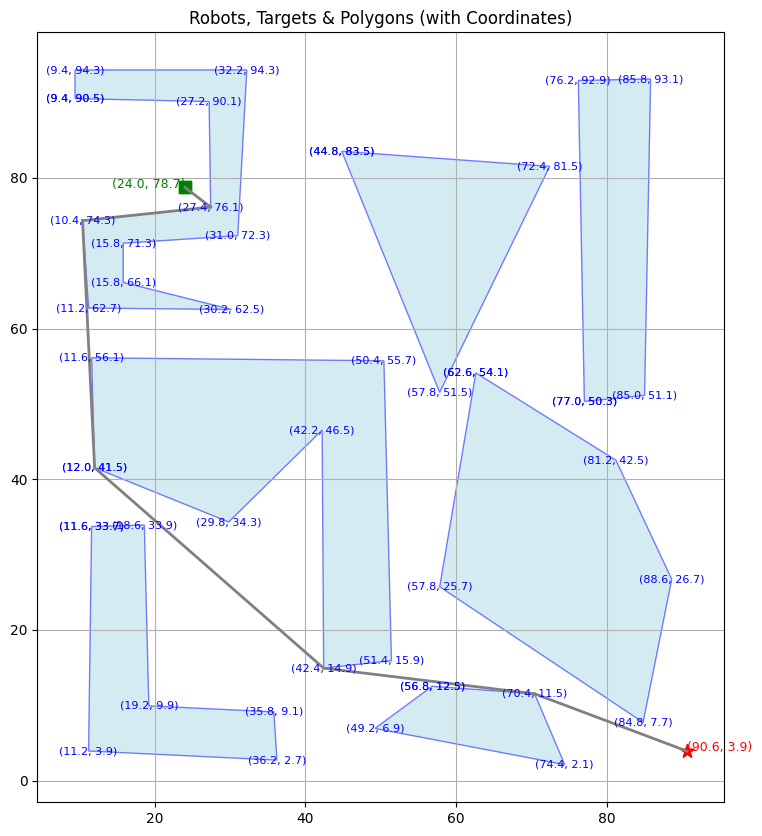

In [22]:
# path = [(8.24, 37.72), (91.04, 50.32)]
visualize_polygons_and_robot_targets(Problems[i], [LineString([path[i], path[i+1]]) for i in range(len(path)-1)])

In [63]:
discount_factor = 0.95
class Robot:
  def __init__(self, start, taskLimit, Coverage:float):
    self.start = start
    self.current = start
    self.tasks = []
    self.paths = []
    self.pathLengths = []
    self.maxTaskLimit = taskLimit
    self.D = Coverage
    self.reward = 0

  def findPathLength(self, path):
    path_length = 0
    for i in range(1, len(path)):
      dist = math.sqrt((path[i-1][0] - path[i][0])**2 + (path[i-1][1] - path[i][1])**2)
      path_length += dist
    return path_length

  def setTask(self, task, path):
    self.tasks.append(task)
    self.current = task
    self.paths.append(path)
    self.pathLengths.append(self.findPathLength(path))

  def earnedReward(self):
    f = 0
    for dist in self.pathLengths:
      f += pow(discount_factor, dist)

    self.reward = f
    return f

  def marginalReward(self, path):
    dist = self.findPathLength(path)
    w_task = pow(discount_factor, dist)
    return w_task

import numpy as np

class Auction:
  def __init__(self, noOfTasks, noOfRobots):
    self.tasks = np.zeros(noOfTasks)
    self.bids = np.zeros((noOfTasks, noOfRobots))
    self.robots = np.zeros(noOfRobots)

  def removeRobot(self, roboIndex):
    self.robots[roboIndex] = 1

  def removeTask(self, taskIndex):
    self.tasks[taskIndex] = 1

  def addBid(self, roboIndex, taskIndex, bid):
    self.bids[roboIndex][taskIndex] = bid

  def isTaskEmpty(self):
    for task in self.tasks:
      if task == 0:
        return False
    return True

  def isRobotsEmpty(self):
    for robot in self.robots:
      if robot == 0:
        return False
    return True


In [92]:
from shapely.geometry import Polygon

# 🟢 Robot
Robots = [
    Robot(start=(8.24, 37.72), taskLimit=2, Coverage=10000),
    Robot(start=(50.44, 19.12), taskLimit=2, Coverage=10000)
]

# 🎯 Tasks
Tasks = [
    (91.04, 50.32),
    (63.84, 63.92)
]

# ⬛ Polygons
Polygons = [
    Polygon([
        (12.04, 44.92),
        (22.44, 44.12),
        (23.44, 58.52),
        (32.64, 57.52),
        (31.24, 31.72),
        (12.84, 30.52),
    ]),  # poly1

    Polygon([
        (39.24, 69.12),
        (60.44, 69.92),
        (60.24, 57.92),
        (40.04, 57.72),
    ]),  # poly2

    Polygon([
        (43.24, 36.72),
        (61.44, 37.32),
        (60.84, 22.52),
        (40.84, 24.32),
    ]),  # poly3

    Polygon([
        (68.64, 57.12),
        (83.44, 56.32),
        (81.84, 37.12),
        (68.84, 37.92),
    ])  # poly4
]

In [93]:
Auc = Auction(len(Tasks), len(Robots))

for i in range(len(Robots)):
  if len(Robots[i].tasks) >= Robots[i].maxTaskLimit:
    Auc.removeRobot(i)

while Auc.isTaskEmpty() == False and Auc.isRobotsEmpty() == False:
  print("hhhihi")
  for i in range(len(Robots)):
    print(f"Robot : {i}")
    if Auc.robots[i] == 0:
      print('yes')
      for j in range(len(Tasks)):
        if Auc.tasks[j] == 0:
          print(f"Task avaialble {j}")
          print(f"current {Robots[i].current}, Task : {Tasks[j]}")
          path = GOSpath(Robots[i].current, Tasks[j], Polygons)
          print(path)
          pathLength = Robots[i].findPathLength(path)

          if pathLength <= Robots[i].D:
            print("reward")
            Auc.addBid(j, i, Robots[i].marginalReward(path))
          else:
            print("zero reward")
            Auc.addBid(j, i, 0)
    else:
      print("unavailable robot")
      for j in range(len(Tasks)):
        Auc.addBid(j, i, 0)

  for i in range(len(Auc.bids)):
    if Auc.tasks[i] == 0:
      maxBid = np.max(Auc.bids[i])
      maxBidIndex = np.argmax(Auc.bids[i])
      if maxBid > 0:
        Auc.removeTask(i)
        Robots[maxBidIndex].setTask(Tasks[i], GOSpath(Robots[maxBidIndex].current, Tasks[i], Polygons))
        Robots[maxBidIndex].earnedReward()

  for i in range(len(Robots)):
    if len(Robots[i].tasks) >= Robots[i].maxTaskLimit or np.max(Auc.bids[:, i]) == 0:
      Auc.removeRobot(i)



hhhihi
Robot : 0
yes
Task avaialble 0
current (8.24, 37.72), Task : (91.04, 50.32)
[(8.24, 37.72), (12.04, 44.92), (23.44, 58.52), (32.64, 57.52), (68.84, 37.92), (81.84, 37.12), (91.04, 50.32)]
reward
Task avaialble 1
current (8.24, 37.72), Task : (63.84, 63.92)
[(8.24, 37.72), (12.04, 44.92), (23.44, 58.52), (39.24, 69.12), (60.44, 69.92), (63.84, 63.92)]
reward
Robot : 1
yes
Task avaialble 0
current (50.44, 19.12), Task : (91.04, 50.32)
[(50.44, 19.12), (60.84, 22.52), (81.84, 37.12), (91.04, 50.32)]
reward
Task avaialble 1
current (50.44, 19.12), Task : (63.84, 63.92)
[(50.44, 19.12), (60.84, 22.52), (63.84, 63.92)]
reward


In [94]:
Robots[1].paths

[[(50.44, 19.12), (60.84, 22.52), (81.84, 37.12), (91.04, 50.32)],
 [(91.04, 50.32), (83.44, 56.32), (63.84, 63.92)]]

[[], [(50.44, 19.12), (60.84, 22.52), (81.84, 37.12), (91.04, 50.32), (91.04, 50.32), (83.44, 56.32), (63.84, 63.92)]]


<ipython-input-95-50573de5f1ff>:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_paths)  # Choose a colormap


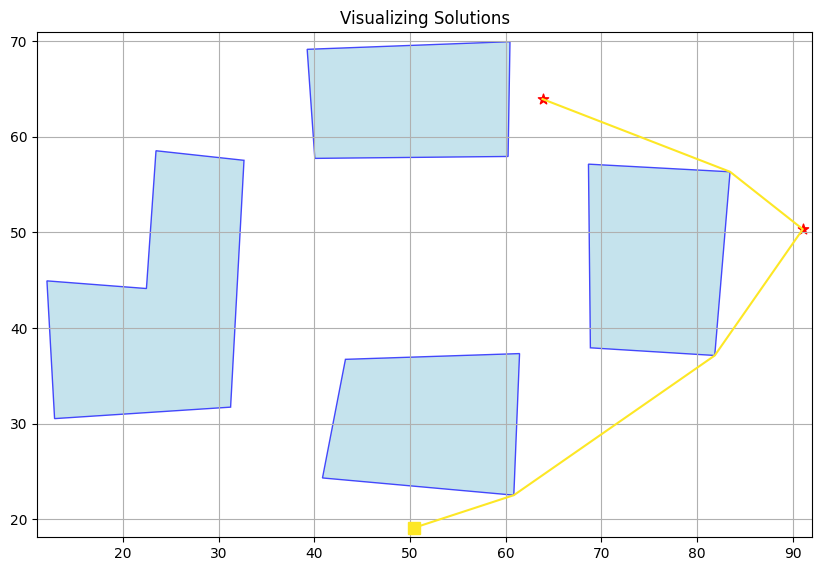

In [95]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def visualize_polygons_and_paths(polygonsObjs, Robots, tasks):
    """
    Visualizes a list of polygons and a list of paths with distinct colors for each path.

    Args:
        polygons (list): A list of lists, where each inner list contains the vertices
                         (list of tuples) of a polygon in clockwise order.
        paths (list): A list of lists, where each inner list contains the points
                      (list of tuples) of a path.
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))  # Adjust figure size as needed
    polygons = [poly.exterior.coords for poly in polygonsObjs]
    paths = []
    for robot in Robots:
      path_robo = []
      for path in robot.paths:
        for vert in path:
          path_robo.append(vert)
      paths.append(path_robo)
    print(paths)
    # Plot the polygons
    for polygon_verts in polygons:
        polygon = patches.Polygon(polygon_verts, closed=True, edgecolor='blue', facecolor='lightblue', alpha=0.7)
        ax.add_patch(polygon)

    # Define marker styles for path points
    start_marker = 's'
    intermediate_marker = 'o'
    end_marker = '*'
    marker_size_start = 8
    marker_size_end = 10

    # Plot the paths with different colors
    num_paths = len(paths)
    cmap = plt.cm.get_cmap('viridis', num_paths)  # Choose a colormap
    ax.scatter(np.array(tasks)[:,0], np.array(tasks)[:,1], c='red', marker=end_marker, label='Start', s=60)
    for i, path_points in enumerate(paths):
        if not path_points:
            continue

        color = cmap(i)

        # Plot start point
        start_x, start_y = path_points[0]
        ax.plot(start_x, start_y, marker=start_marker, color=color, markersize=marker_size_start,
                label=f'Path {i+1} Start' if len(path_points) == 1 else None)

        # Plot intermediate points
        if len(path_points) > 2:
            intermediate_x = [p[0] for p in path_points[1:-1]]
            intermediate_y = [p[1] for p in path_points[1:-1]]
            ax.plot(intermediate_x, intermediate_y, marker='', linestyle='None', color=color,
                    label=f'Path {i+1} Intermediate' if len(path_points) > 2 and i == 0 else None) # Label only once

        # Plot end point
        # if len(path_points) > 1:
        #     end_x, end_y = path_points[-1]
        #     ax.plot(end_x, end_y, marker=end_marker, color=color, markersize=marker_size_end,
        #             label=f'Path {i+1} End')
        # elif len(path_points) == 1:
        #     ax.plot(start_x, start_y, marker=end_marker, color=color, markersize=marker_size_end,
        #             label=f'Path {i+1} End') # Mark single point as end too

        # Plot the connecting line without markers
        x_path, y_path = zip(*path_points)
        ax.plot(x_path, y_path, linestyle='-', color=color, label=f'Path {i+1}')

    # Set plot limits to encompass all shapes
    all_x = []
    all_y = []

    for polygon_verts in polygons:
        for x, y in polygon_verts:
            all_x.append(x)
            all_y.append(y)

    for path in paths:
        for x, y in path:
            all_x.append(x)
            all_y.append(y)

    if all_x and all_y:
        x_min, x_max = min(all_x) - 1, max(all_x) + 1
        y_min, y_max = min(all_y) - 1, max(all_y) + 1
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
    else:
        ax.set_xlim(-1, 10)
        ax.set_ylim(-3, 3)

    # Add labels and title
    # ax.set_xlabel("X-axis")
    # ax.set_ylabel("Y-axis")
    ax.set_title("Visualizing Solutions")
    # ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

    # Display the plot
    plt.show()

# Example Usage:
# Polygons = [
#     Polygon([(1,1),(2,1),(2,-1),(1,-1)]),
#     Polygon([(4,2),(5,0.5),(3,0.5)]),
#     Polygon([(3,-0.5), (5,-0.5), (5,-2), (3,-2)])]


visualize_polygons_and_paths(Polygons, Robots, Tasks)